In [42]:
# Importing libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
# Importing Test file
df_test = pd.read_csv(r"C:\Users\joaoa\Desktop\Ironhack\Labs\Project-FIFA-MoneyBall\FIFA_TEST_DATA.CSV", sep="?")
df_test

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Player Photo,Club Logo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,15195,252942,G. Borrelli,19,Italy,Pescara,ST,ST,https://cdn.sofifa.com/players/252/942/20_120.png,https://cdn.sofifa.com/teams/200/light_60.png,...,35+2,35+2,34+2,34+2,38+2,38+2,38+2,34+2,16+2,Male
1,14193,248174,N. Boujellab,21,Morocco,FC Schalke 04,CAM,CAM CM CDM,https://cdn.sofifa.com/players/248/174/20_120.png,https://cdn.sofifa.com/teams/34/light_60.png,...,56+2,56+2,57+2,56+2,53+2,53+2,53+2,56+2,17+2,Male
2,16722,257995,A. Wahab Ibrahim,21,Ghana,Famalicão,LB,LB,https://cdn.sofifa.com/players/257/995/20_120.png,https://cdn.sofifa.com/teams/112809/light_60.png,...,57+2,57+2,60+2,60+2,59+2,59+2,59+2,60+2,14+2,Male
3,8037,226077,A. Gabr,29,Egypt,Egypt,CB,CB,https://cdn.sofifa.com/players/226/077/19_120.png,https://cdn.sofifa.com/teams/111130/light_60.png,...,63+1,63+1,59+1,62+1,67+1,67+1,67+1,62+1,14+1,Male
4,6350,216054,N. Domínguez,30,Argentina,Racing Club,CDM,CB CDM,https://cdn.sofifa.com/players/216/054/20_120.png,https://cdn.sofifa.com/teams/101085/light_60.png,...,78+-2,78+-2,74+2,74+2,76+0,76+0,76+0,74+2,20+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,11379,239431,I. Maela,27,South Africa,Orlando Pirates,LB,LB CB,https://cdn.sofifa.com/players/239/431/20_120.png,https://cdn.sofifa.com/teams/110930/light_60.png,...,60+2,60+2,67+2,67+2,65+2,65+2,65+2,67+2,18+2,Male
3421,5503,211514,R. James,26,England,Doncaster Rovers,LWB,LB,https://cdn.sofifa.com/players/211/514/20_120.png,https://cdn.sofifa.com/teams/142/light_60.png,...,63+2,63+2,68+2,67+2,62+2,62+2,62+2,67+2,15+2,Male
3422,9676,233193,Ribamar,21,Brazil,Ohod Club,ST,ST,https://cdn.sofifa.com/players/233/193/19_120.png,https://cdn.sofifa.com/teams/113219/light_60.png,...,42+1,42+1,43+1,42+1,41+1,41+1,41+1,42+1,16+1,Male
3423,9272,231507,A. Soto,26,Argentina,Racing Club,LWB,LB,https://cdn.sofifa.com/players/231/507/20_120.png,https://cdn.sofifa.com/teams/101085/light_60.png,...,67+2,67+2,72+2,70+2,67+2,67+2,67+2,70+2,15+2,Male


In [44]:
# Importing Train file
df_train = pd.read_csv(r"C:\Users\joaoa\Desktop\Ironhack\Labs\Project-FIFA-MoneyBall\FIFA_TRAIN_DATA.CSV", sep="?")
df_train

,Unnamed: 0,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,...,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,...,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,17117,259083,S. Diarrassouba,18,58,Burkina Faso,FC St. Gallen,61,RM,CAM LM,...,48+2,48+2,50+2,48+2,43+2,43+2,43+2,48+2,16+2,Male
13696,17118,259084,R. Shanley,19,54,Scotland,Hibernian,56,ST,ST,...,36+2,36+2,39+2,38+2,37+2,37+2,37+2,38+2,15+2,Male
13697,17119,259085,F. Tapia,19,60,Mexico,Club América,60,GK,GK,...,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,59+2,Male
13698,17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male


In [45]:
# Standardizing header names
cols_test = []
for i in range(len(df_test.columns)):
    cols_test.append(df_test.columns[i].lower().replace(" ","_"))
df_test.columns = cols_test

cols_train = []
for i in range(len(df_train.columns)):
    cols_train.append(df_train.columns[i].lower().replace(" ","_"))
df_train.columns = cols_train

In [46]:
# Computing the type of each contract
def classify_contract(df_train):
    if 'On Loan' in df_train:
        return 'Loan'
    elif 'Free' in df_train:
        return 'Free'
    else:
        return 'Permanent'
df_train['contract'] = df_train['contract'].apply(classify_contract)
df_train

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,...,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,...,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,17117,259083,S. Diarrassouba,18,58,Burkina Faso,FC St. Gallen,61,RM,CAM LM,...,48+2,48+2,50+2,48+2,43+2,43+2,43+2,48+2,16+2,Male
13696,17118,259084,R. Shanley,19,54,Scotland,Hibernian,56,ST,ST,...,36+2,36+2,39+2,38+2,37+2,37+2,37+2,38+2,15+2,Male
13697,17119,259085,F. Tapia,19,60,Mexico,Club América,60,GK,GK,...,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,59+2,Male
13698,17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male


In [47]:
# Dropping irrelevant columns
df_train = df_train.drop(["club","position","bp","nationality","foot","unnamed:_0","id","name", "player_photo", "club_logo", "gender", "bov", "pot", "flag_photo", "team_&_contract", "joined", "loan_date_end"], axis=1)
df_train

,age,ova,height,weight,growth,value,wage,release_clause,contract,attacking,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,37,71,"5'10""",143lbs,0,€600K,€7K,€1.1M,Permanent,337,...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
1,33,71,"5'9""",161lbs,0,€1.1M,€15K,€0,Permanent,337,...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
2,36,81,"5'7""",150lbs,0,€5.5M,€12K,€7.2M,Permanent,367,...,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3
3,38,77,"5'7""",159lbs,0,€2.8M,€44K,€5.3M,Permanent,342,...,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2
4,39,78,"5'10""",157lbs,0,€1K,€60K,€0,Permanent,380,...,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,18,58,"5'5""",123lbs,19,€250K,€900,€519K,Permanent,238,...,48+2,48+2,48+2,50+2,48+2,43+2,43+2,43+2,48+2,16+2
13696,19,54,"6'1""",161lbs,14,€150K,€900,€356K,Permanent,223,...,36+2,36+2,36+2,39+2,38+2,37+2,37+2,37+2,38+2,15+2
13697,19,60,"6'1""",174lbs,12,€300K,€2K,€570K,Permanent,67,...,26+2,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,59+2
13698,18,56,"5'10""",170lbs,10,€130K,€3K,€273K,Permanent,248,...,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2


In [48]:
# Converting the height of the players to inches
df_train["height"] = df_train["height"].str.replace('"',"")
df_train["height"] = df_train["height"].str.split("'").str[0].astype("int")*12 + df_train["height"].str.split("'").str[1].astype("int")

# Deleting "lbs" from "weight" column and converting all values to integers
df_train["weight"] = df_train["weight"].str.replace("lbs","").astype("int")

# Deleting "€" from "value", "wage" and "release_clause" columns, and dealing with different units
count = 5
for _ in range(0,3):
    column = df_train.columns[count]
    df_train["auxiliar"] = df_train[column]
    df_train[column] = df_train[column].str.replace("€","").str.replace("K","").str.replace("M","")
    df_train.loc[df_train["auxiliar"].str.contains("K"), column] = df_train[column].astype(float)*1000
    df_train.loc[df_train["auxiliar"].str.contains("M"), column] = df_train[column].astype(float)*1000000
    df_train[column] = df_train[column].astype("int")
    count += 1
df_train.drop("auxiliar", axis=1, inplace=True)

# Dealing with different units in "hits" column
df_train["auxiliar"] = df_train["hits"]
df_train["hits"] = df_train["hits"].str.replace("K","")
df_train.loc[df_train["auxiliar"].str.contains("K"), "hits"] = df_train["hits"].astype(float)*1000
df_train["hits"] = df_train["hits"].astype("int")
df_train.drop("auxiliar", axis=1, inplace=True)

# Deleting "★" from "w/f", "sm" and "ir" columns and converting all values to integers
df_train["w/f"] = df_train["w/f"].str.replace(" ★","").astype("int")
df_train["sm"] = df_train["sm"].str.replace("★","").astype("int")
df_train["ir"] = df_train["ir"].str.replace("★","").astype("int")

# Computing the sum in the last columns
count = 64
for _ in range(0,27):
    column = df_train.columns[count]
    df_train[column] = df_train[column].str.split("+").str[0].astype("int") + df_train[column].str.split("+").str[1].astype("int")
    count += 1

In [49]:
# Dropping null values
df_train = df_train.dropna()
df_train = df_train.reset_index()
df_train = df_train.drop(['index'], axis=1)
df_train

,age,ova,height,weight,growth,value,wage,release_clause,contract,attacking,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,37,71,70,143,0,600000,7000,1100000,Permanent,337,...,67,67,67,63,61,61,61,61,61,18
1,36,81,67,150,0,5500000,12000,7200000,Permanent,367,...,76,76,76,73,70,67,67,67,70,20
2,38,77,67,159,0,2800000,44000,5300000,Permanent,342,...,74,74,74,68,66,67,67,67,66,18
3,35,80,69,161,0,5500000,10000,0,Permanent,380,...,58,58,58,58,53,48,48,48,53,21
4,42,82,76,203,0,2200000,41000,3600000,Permanent,95,...,36,36,36,31,29,32,32,32,29,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,18,58,65,123,19,250000,900,519000,Permanent,238,...,50,50,50,52,50,45,45,45,50,18
13367,19,54,73,161,14,150000,900,356000,Permanent,223,...,38,38,38,41,40,39,39,39,40,17
13368,19,60,73,174,12,300000,2000,570000,Permanent,67,...,28,28,28,24,24,29,29,29,24,61
13369,18,56,70,170,10,130000,3000,273000,Permanent,248,...,54,54,54,55,54,51,51,51,54,19


In [50]:
# Creating a new dataframe with numerical values
df_num = df_train.select_dtypes(include=np.number)
df_num

,age,ova,height,weight,growth,value,wage,release_clause,attacking,crossing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,37,71,70,143,0,600000,7000,1100000,337,68,...,67,67,67,63,61,61,61,61,61,18
1,36,81,67,150,0,5500000,12000,7200000,367,75,...,76,76,76,73,70,67,67,67,70,20
2,38,77,67,159,0,2800000,44000,5300000,342,80,...,74,74,74,68,66,67,67,67,66,18
3,35,80,69,161,0,5500000,10000,0,380,68,...,58,58,58,58,53,48,48,48,53,21
4,42,82,76,203,0,2200000,41000,3600000,95,13,...,36,36,36,31,29,32,32,32,29,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,18,58,65,123,19,250000,900,519000,238,47,...,50,50,50,52,50,45,45,45,50,18
13367,19,54,73,161,14,150000,900,356000,223,30,...,38,38,38,41,40,39,39,39,40,17
13368,19,60,73,174,12,300000,2000,570000,67,12,...,28,28,28,24,24,29,29,29,24,61
13369,18,56,70,170,10,130000,3000,273000,248,50,...,54,54,54,55,54,51,51,51,54,19


In [51]:
# Creating a new dataframe with categorical values
df_categ = df_train.select_dtypes(include = object)

# One hot enconding
dummies = pd.get_dummies(df_categ, drop_first = False)
dummies

,contract_Free,contract_Loan,contract_Permanent,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,0,0,1,0,0,1,0,0,1
1,0,0,1,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,1
3,0,0,1,1,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
13366,0,0,1,1,0,0,0,0,1
13367,0,0,1,0,0,1,0,0,1
13368,0,0,1,0,0,1,0,0,1
13369,0,0,1,0,0,1,0,0,1


In [52]:
# Concatenating numerical and categorical dataframes
df_concat = pd.concat([df_num, dummies], axis=1, ignore_index=False)
df_concat1 = df_concat
df_concat1

,age,ova,height,weight,growth,value,wage,release_clause,attacking,crossing,...,gk,contract_Free,contract_Loan,contract_Permanent,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,37,71,70,143,0,600000,7000,1100000,337,68,...,18,0,0,1,0,0,1,0,0,1
1,36,81,67,150,0,5500000,12000,7200000,367,75,...,20,0,0,1,1,0,0,0,0,1
2,38,77,67,159,0,2800000,44000,5300000,342,80,...,18,0,0,1,0,0,1,0,0,1
3,35,80,69,161,0,5500000,10000,0,380,68,...,21,0,0,1,1,0,0,0,1,0
4,42,82,76,203,0,2200000,41000,3600000,95,13,...,82,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,18,58,65,123,19,250000,900,519000,238,47,...,18,0,0,1,1,0,0,0,0,1
13367,19,54,73,161,14,150000,900,356000,223,30,...,17,0,0,1,0,0,1,0,0,1
13368,19,60,73,174,12,300000,2000,570000,67,12,...,61,0,0,1,0,0,1,0,0,1
13369,18,56,70,170,10,130000,3000,273000,248,50,...,19,0,0,1,0,0,1,0,0,1


In [53]:
# X-y split
X = df_concat1.drop('ova', axis=1)
y = df_concat1['ova']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# sm model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:56:51   Log-Likelihood:                -22451.
No. Observations:               10696   AIC:                         4.504e+04
Df Residuals:                   10627   BIC:                         4.554e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.3064      0.543     18.972      0.000       9.242      11.371
age                    0.0275      0.010      2.863      0.004       0.009       0.046
height                -0.0574      0.014     -4.047      0.000      -0.085      -0.030
weight                 0.0064      0.002      2.889      0.004       0.002       0.011
growth                -0.1130      0.008    -14.742      0.000      -0.128      -0.098
value               2.259e-07   2.22e-08     10.154      0.000    1.82e-07     2.7e-07
wage                5.013e-07   1.69e-06      0.297      0.766    -2.8e-06     3.8e-06
release_clause     -3.112e-08    1.1e-08     -2.828      0.005   -5.27e-08   -9.55e-09
attacking             -0.0113      0.003     -3.744      0.000      -0.017      -0.005
crossing              -0.0257      0.008     -3.326      0.001      -0.041      -0.011
finishing             -0.0512      0.009     -5.608      0.000      -0.069      -0.033
heading_accuracy       0.0819      0.006     13.689      0.000       0.070       0.094
short_passing         -0.0391      0.009     -4.501      0.000      -0.056      -0.022
volleys                0.0228      0.005      4.475      0.000       0.013       0.033
skill                 -0.0345      0.004     -9.067      0.000      -0.042      -0.027
dribbling             -0.1092      0.010    -10.444      0.000      -0.130      -0.089
curve                  0.0515      0.006      9.192      0.000       0.041       0.063
fk_accuracy            0.0572      0.006     10.347      0.000       0.046       0.068
long_passing          -0.0296      0.007     -4.217      0.000      -0.043      -0.016
ball_control          -0.0045      0.009     -0.482      0.630      -0.023       0.014
movement               0.0133      0.003      4.773      0.000       0.008       0.019
acceleration          -0.0534      0.007     -7.885      0.000      -0.067      -0.040
sprint_speed          -0.0682      0.008     -8.347      0.000      -0.084      -0.052
agility               -0.0152      0.005     -2.809      0.005      -0.026      -0.005
reactions              0.1639      0.007     22.582      0.000       0.150       0.178
balance               -0.0138      0.005     -2.597      0.009      -0.024      -0.003
power                 -0.0129      0.002     -5.711      0.000      -0.017      -0.008
shot_power             0.0124      0.005      2.481      0.013       0.003       0.022
jumping                0.0365      0.003     12.172      0.000       0.031       0.042
stamina               -0.0510      0.006     -9.241      0.000      -0.062      -0.040
strength              -0.0017      0.005     -0.318      0.751      -0.012       0.009
long_shots            -0.0091      0.005     -1.874      0.061      -0.019       0.000
mentality             -0.0333      0.0

In [54]:
# X-y split
X = df_concat1.drop('ova', axis=1)
y = df_concat1['ova']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# lm model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
print("R2 of y_train predictions is =", round(model.score(X_train, y_train), 4))
y_predictions = lm.predict(X_test)

# Calculating errors
r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 of y_test predictions is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 4))
print("The root mean squared error of the model is =", round(rmse, 4))
print("The mean absolute error of the model is =", round(mae, 4))

R2 of y_train predictions is = 0.9164
R2 of y_test predictions is = 0.9146
The mean squared error of the model is = 3.977
The root mean squared error of the model is = 1.9942
The mean absolute error of the model is = 1.5503


In [55]:
# Dropping columns with small coefficient
df_concat2 = df_concat1.drop(['cf','rf','st','rs','lam','cam','lcm','cm','ldm','cdm','lcb','cb'], axis = 1)
df_concat2

,age,ova,height,weight,growth,value,wage,release_clause,attacking,crossing,...,gk,contract_Free,contract_Loan,contract_Permanent,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,37,71,70,143,0,600000,7000,1100000,337,68,...,18,0,0,1,0,0,1,0,0,1
1,36,81,67,150,0,5500000,12000,7200000,367,75,...,20,0,0,1,1,0,0,0,0,1
2,38,77,67,159,0,2800000,44000,5300000,342,80,...,18,0,0,1,0,0,1,0,0,1
3,35,80,69,161,0,5500000,10000,0,380,68,...,21,0,0,1,1,0,0,0,1,0
4,42,82,76,203,0,2200000,41000,3600000,95,13,...,82,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,18,58,65,123,19,250000,900,519000,238,47,...,18,0,0,1,1,0,0,0,0,1
13367,19,54,73,161,14,150000,900,356000,223,30,...,17,0,0,1,0,0,1,0,0,1
13368,19,60,73,174,12,300000,2000,570000,67,12,...,61,0,0,1,0,0,1,0,0,1
13369,18,56,70,170,10,130000,3000,273000,248,50,...,19,0,0,1,0,0,1,0,0,1


In [57]:
# X-y split
X = df_concat2.drop('ova', axis=1)
y = df_concat2['ova']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# lm model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

# Calculating errors
r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 4))
print("The root mean squared error of the model is =", round(rmse, 4))
print("The mean absolute error of the model is =", round(mae, 4))

R2 value is = 0.9146
The mean squared error of the model is = 3.977
The root mean squared error of the model is = 1.9942
The mean absolute error of the model is = 1.5503


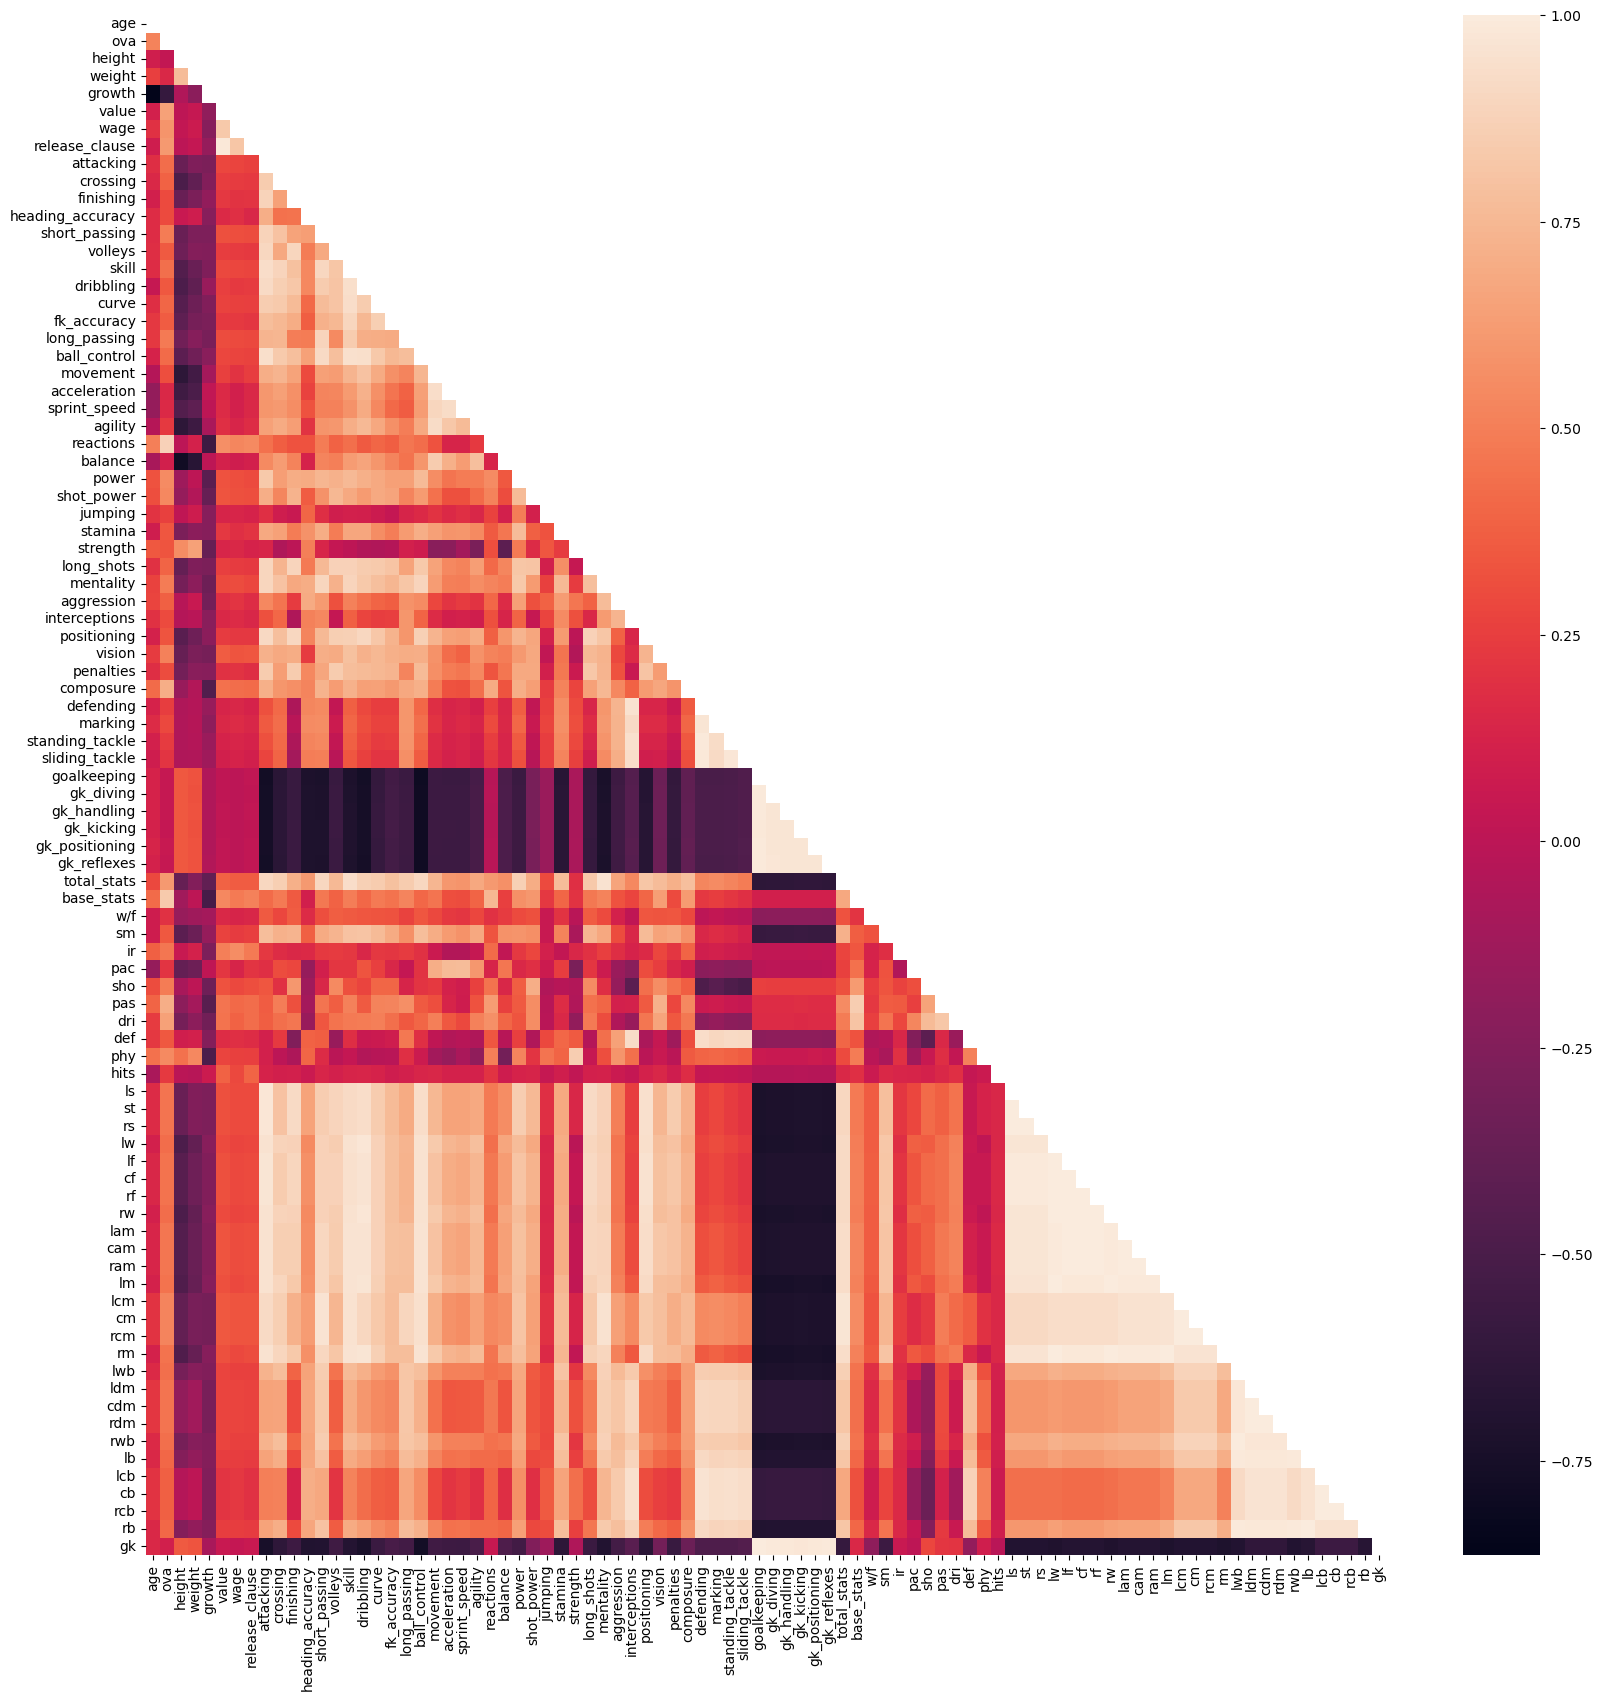

In [16]:
# Multicollinearity
correlations_matrix = df_train.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True #
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=False)
plt.show()

In [17]:
correlations_matrix = df_train.corr()
correlations_matrix

,age,ova,height,weight,growth,value,wage,release_clause,attacking,crossing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
age,1.000000,0.516235,0.092014,0.250982,-0.864133,0.107458,0.196009,0.089280,0.184393,0.152012,...,0.218972,0.218972,0.218972,0.155498,0.153215,0.200139,0.200139,0.200139,0.153215,0.154615
ova,0.516235,1.000000,0.026082,0.148200,-0.599729,0.643616,0.587230,0.613820,0.425843,0.383855,...,0.461043,0.461043,0.461043,0.432811,0.406437,0.376104,0.376104,0.376104,0.406437,0.104298
height,0.092014,0.026082,1.000000,0.767518,-0.052100,0.002447,0.025580,0.000889,-0.356481,-0.494180,...,-0.180428,-0.180428,-0.180428,-0.298894,-0.239699,-0.036235,-0.036235,-0.036235,-0.239699,0.352115
weight,0.250982,0.148200,0.767518,1.000000,-0.215766,0.042800,0.070193,0.035201,-0.261077,-0.396134,...,-0.116146,-0.116146,-0.116146,-0.231938,-0.183365,0.007696,0.007696,0.007696,-0.183365,0.334353
growth,-0.864133,-0.599729,-0.052100,-0.215766,1.000000,-0.190075,-0.235255,-0.166428,-0.278303,-0.249787,...,-0.293158,-0.293158,-0.293158,-0.254156,-0.242576,-0.256229,-0.256229,-0.256229,-0.242576,-0.087555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lcb,0.200139,0.376104,-0.036235,0.007696,-0.256229,0.207913,0.222280,0.198949,0.502668,0.506584,...,0.961799,0.961799,0.961799,0.914196,0.952942,1.000000,1.000000,1.000000,0.952942,-0.572337
cb,0.200139,0.376104,-0.036235,0.007696,-0.256229,0.207913,0.222280,0.198949,0.502668,0.506584,...,0.961799,0.961799,0.961799,0.914196,0.952942,1.000000,1.000000,1.000000,0.952942,-0.572337
rcb,0.200139,0.376104,-0.036235,0.007696,-0.256229,0.207913,0.222280,0.198949,0.502668,0.506584,...,0.961799,0.961799,0.961799,0.914196,0.952942,1.000000,1.000000,1.000000,0.952942,-0.572337
rb,0.153215,0.406437,-0.239699,-0.183365,-0.242576,0.249912,0.247030,0.239258,0.654580,0.706097,...,0.982472,0.982472,0.982472,0.991806,1.000000,0.952942,0.952942,0.952942,1.000000,-0.671014


In [19]:
# Dropping columns with low correlation with ova
df_concat3 = df_concat2.drop(['height', 'weight', 'heading_accuracy', 'acceleration', 'sprint_speed',
       'agility', 'balance', 'jumping', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'w/f',
       'pac', 'hits', 'gk', 'contract_Free', 'contract_Loan',
       'contract_Permanent', 'a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High',
       'd/w_Low', 'd/w_Medium'], axis=1)
df_concat3

,age,ova,growth,value,wage,release_clause,attacking,crossing,finishing,short_passing,...,ram,lm,rcm,rm,lwb,rdm,rwb,lb,rcb,rb
0,37,71,0,600000,7000,1100000,337,68,64,76,...,71,69,71,69,63,67,63,61,61,61
1,36,81,0,5500000,12000,7200000,367,75,69,90,...,81,81,81,81,73,76,73,70,67,70
2,38,77,0,2800000,44000,5300000,342,80,66,84,...,77,74,77,74,68,74,68,66,67,66
3,35,80,0,5500000,10000,0,380,68,84,81,...,80,79,75,79,58,58,58,53,48,53
4,42,82,0,2200000,41000,3600000,95,13,15,37,...,37,35,38,35,31,36,31,29,32,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,18,58,19,250000,900,519000,238,47,45,62,...,60,61,56,61,52,50,52,50,45,50
13367,19,54,14,150000,900,356000,223,30,55,43,...,52,51,45,51,41,38,41,40,39,40
13368,19,60,12,300000,2000,570000,67,12,8,23,...,25,23,27,23,24,28,24,24,29,24
13369,18,56,10,130000,3000,273000,248,50,43,64,...,58,58,57,58,55,54,55,54,51,54


In [20]:
# X-y split
X = df_concat3.drop('ova', axis=1)
y = df_concat3['ova']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# lm model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

# Calculating errors
r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 4))
print("The root mean squared error of the model is =", round(rmse, 4))
print("The mean absolute error of the model is =", round(mae, 4))

R2 value is = 0.912
The mean squared error of the model is = 4.095
The root mean squared error of the model is = 2.0236
The mean absolute error of the model is = 1.5738


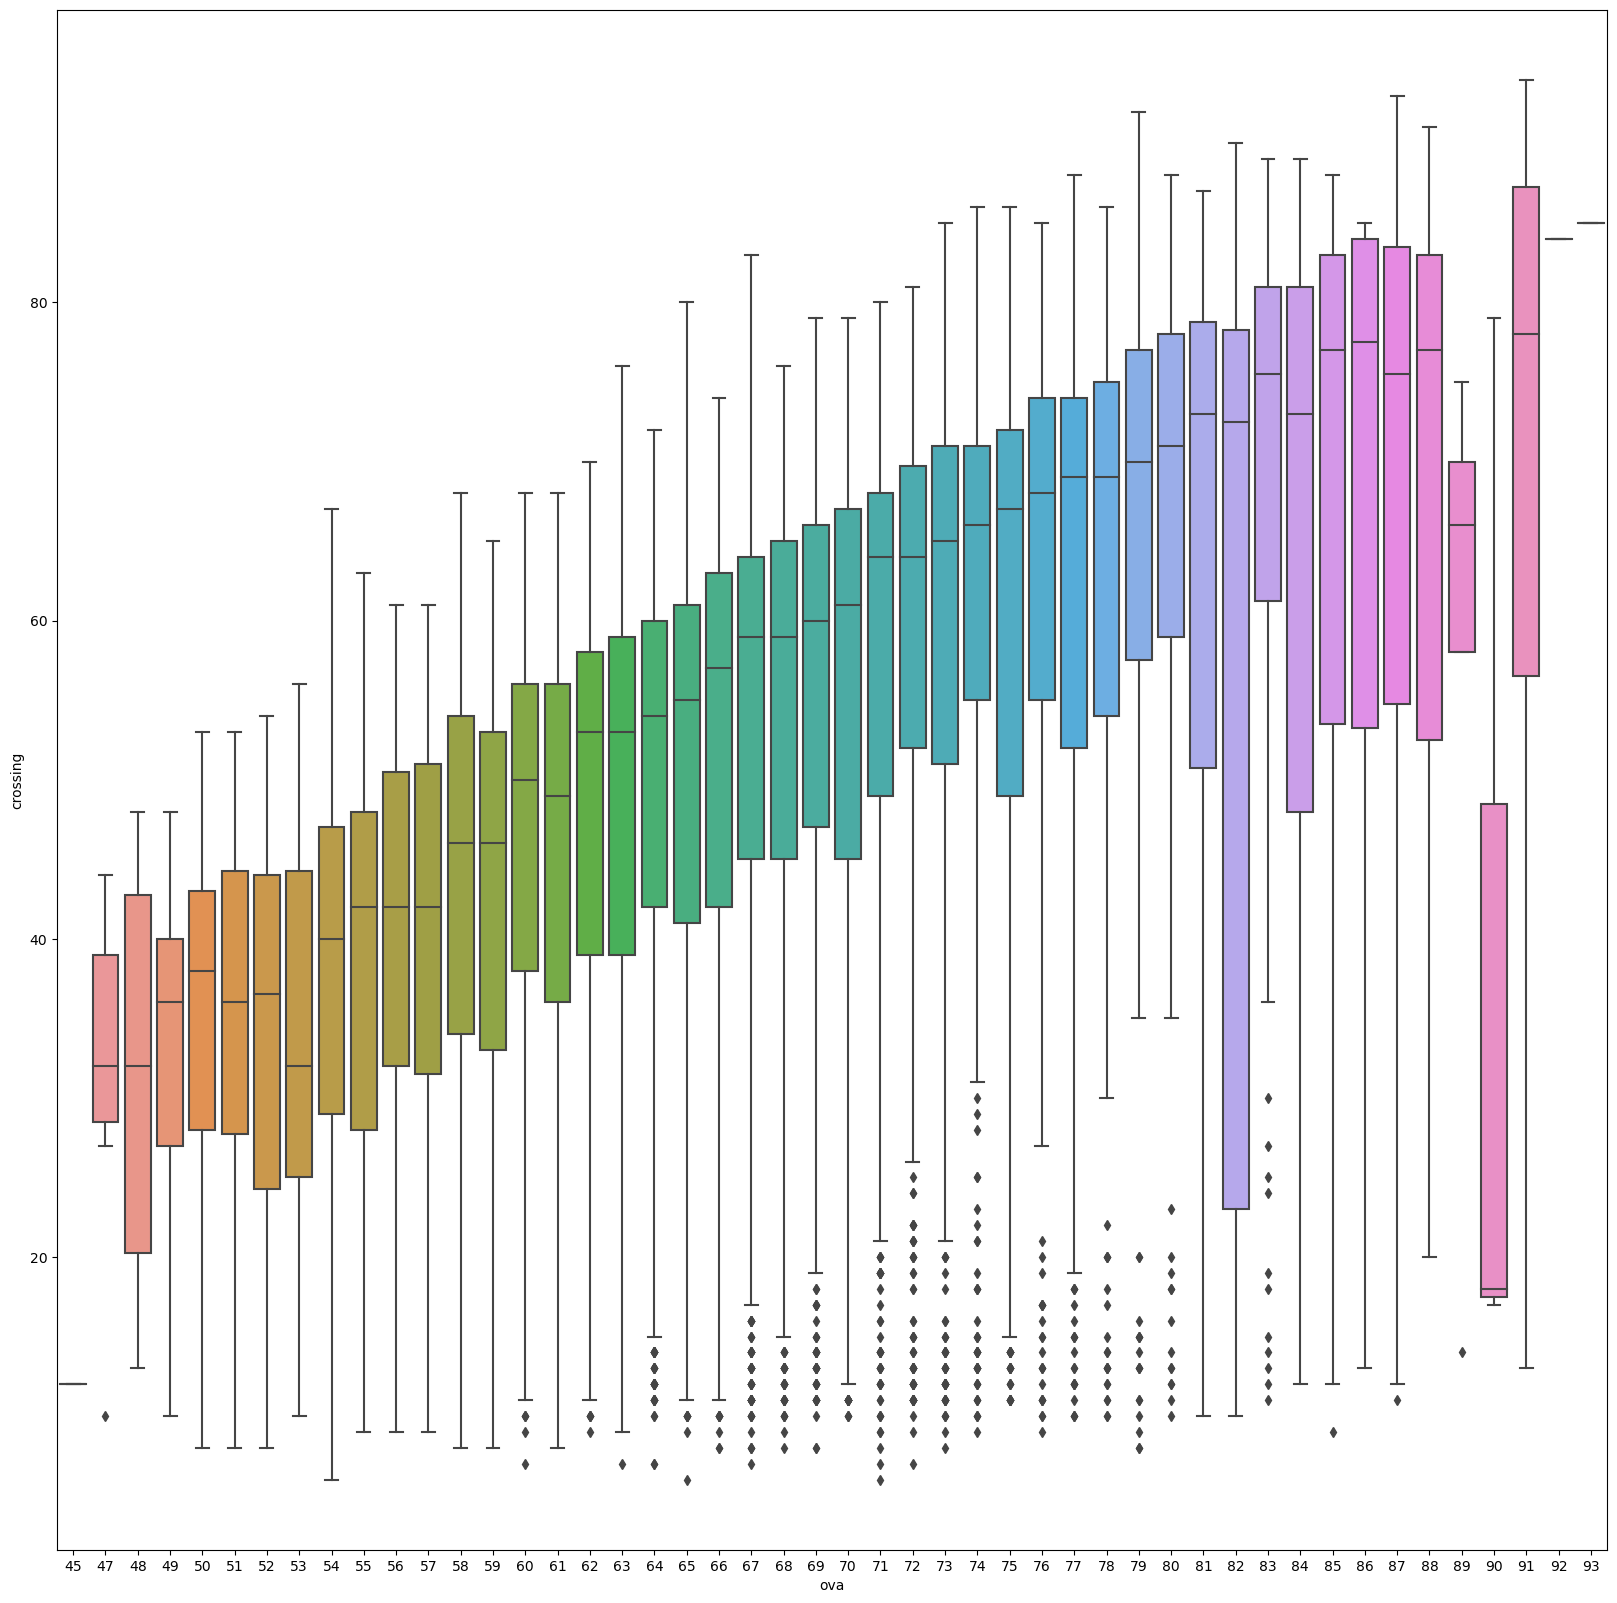

In [21]:
# Creating a boxplot ("ova" vs "crossing")
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(x = df_concat['ova'], y = df_concat['crossing'], data=df_concat)
plt.show()

In [22]:
# Removing outliers
column = ['age','growth', 'value', 'wage', 'release_clause', 'attacking',
       'crossing', 'finishing', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'reactions', 'power', 'shot_power', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'total_stats', 'base_stats', 'sm',
       'ir', 'sho', 'pas', 'dri', 'def', 'phy', 'ls', 'lw', 'lf', 'rw', 'ram',
       'lm', 'rcm', 'rm', 'lwb', 'rdm', 'rwb', 'lb', 'rcb', 'rb']

Q1 = df_concat3[column].quantile(0.25)
Q3 = df_concat3[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (df_concat3[column] < lower_bound) | (df_concat3[column] > upper_bound)
df_no_outliers = df_concat3[~outlier_mask]
df_no_outliers

,age,ova,growth,value,wage,release_clause,attacking,crossing,finishing,short_passing,...,ram,lm,rcm,rm,lwb,rdm,rwb,lb,rcb,rb
0,37.0,NaN,0.0,600000.0,7000.0,1100000.0,337.0,68,64,76.0,...,71.0,69.0,71.0,69.0,63.0,67.0,63.0,61.0,61,61.0
1,36.0,NaN,0.0,5500000.0,12000.0,7200000.0,367.0,75,69,NaN,...,81.0,81.0,81.0,81.0,73.0,76.0,73.0,70.0,67,70.0
2,38.0,NaN,0.0,2800000.0,NaN,5300000.0,342.0,80,66,84.0,...,77.0,74.0,77.0,74.0,68.0,74.0,68.0,66.0,67,66.0
3,35.0,NaN,0.0,5500000.0,10000.0,0.0,380.0,68,84,81.0,...,80.0,79.0,75.0,79.0,58.0,58.0,58.0,53.0,48,53.0
4,NaN,NaN,0.0,2200000.0,NaN,3600000.0,NaN,13,15,37.0,...,37.0,35.0,38.0,35.0,31.0,36.0,31.0,29.0,32,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,18.0,NaN,19.0,250000.0,900.0,519000.0,238.0,47,45,62.0,...,60.0,61.0,56.0,61.0,52.0,50.0,52.0,50.0,45,50.0
13367,19.0,NaN,14.0,150000.0,900.0,356000.0,223.0,30,55,43.0,...,52.0,51.0,45.0,51.0,41.0,38.0,41.0,40.0,39,40.0
13368,19.0,NaN,12.0,300000.0,2000.0,570000.0,NaN,12,8,NaN,...,NaN,NaN,NaN,NaN,NaN,28.0,NaN,24.0,29,24.0
13369,18.0,NaN,10.0,130000.0,3000.0,273000.0,248.0,50,43,64.0,...,58.0,58.0,57.0,58.0,55.0,54.0,55.0,54.0,51,54.0


In [23]:
# Dropping null values
df_no_outliers = df_no_outliers.astype(float)
df_no_outliers['ova'] = df_concat['ova']
df_concat4 = df_no_outliers.dropna()
df_concat4

,age,ova,growth,value,wage,release_clause,attacking,crossing,finishing,short_passing,...,ram,lm,rcm,rm,lwb,rdm,rwb,lb,rcb,rb
0,37.0,71,0.0,600000.0,7000.0,1100000.0,337.0,68.0,64.0,76.0,...,71.0,69.0,71.0,69.0,63.0,67.0,63.0,61.0,61.0,61.0
9,37.0,71,0.0,850000.0,6000.0,1300000.0,337.0,58.0,77.0,63.0,...,69.0,68.0,62.0,68.0,54.0,52.0,54.0,51.0,49.0,51.0
21,36.0,63,0.0,130000.0,2000.0,228000.0,288.0,41.0,66.0,58.0,...,61.0,58.0,58.0,58.0,49.0,52.0,49.0,48.0,51.0,48.0
29,36.0,58,0.0,45000.0,2000.0,79000.0,261.0,47.0,54.0,52.0,...,57.0,58.0,55.0,58.0,51.0,51.0,51.0,50.0,50.0,50.0
32,36.0,74,0.0,275000.0,10000.0,0.0,348.0,76.0,68.0,79.0,...,74.0,74.0,74.0,74.0,58.0,61.0,58.0,55.0,53.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364,18.0,52,15.0,100000.0,500.0,188000.0,226.0,44.0,44.0,53.0,...,55.0,55.0,54.0,55.0,52.0,51.0,52.0,52.0,50.0,52.0
13366,18.0,58,19.0,250000.0,900.0,519000.0,238.0,47.0,45.0,62.0,...,60.0,61.0,56.0,61.0,52.0,50.0,52.0,50.0,45.0,50.0
13367,19.0,54,14.0,150000.0,900.0,356000.0,223.0,30.0,55.0,43.0,...,52.0,51.0,45.0,51.0,41.0,38.0,41.0,40.0,39.0,40.0
13369,18.0,56,10.0,130000.0,3000.0,273000.0,248.0,50.0,43.0,64.0,...,58.0,58.0,57.0,58.0,55.0,54.0,55.0,54.0,51.0,54.0


In [24]:
# X-y split
X = df_concat4.drop('ova', axis=1)
y = df_concat4['ova']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# lm model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

# Calculating errors
r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 4))
print("The root mean squared error of the model is =", round(rmse, 4))
print("The mean absolute error of the model is =", round(mae, 4))

R2 value is = 0.8809
The mean squared error of the model is = 3.1938
The root mean squared error of the model is = 1.7871
The mean absolute error of the model is = 1.3875


In [25]:
# Selecting top 1500 players
df_concat5 = df_concat3.nlargest(1500, 'ova')
df_concat5

,age,ova,growth,value,wage,release_clause,attacking,crossing,finishing,short_passing,...,ram,lm,rcm,rm,lwb,rdm,rwb,lb,rcb,rb
417,33,93,0,67500000,560000,138400000,429,85,95,91,...,93,93,90,93,69,68,69,65,55,65
35,35,92,0,46000000,220000,75900000,437,84,95,82,...,91,91,84,91,68,64,68,64,57,64
1595,31,91,0,80000000,240000,132000000,423,71,94,84,...,88,86,82,86,67,68,67,64,63,64
1882,28,91,0,90000000,270000,166500000,408,85,87,87,...,91,91,86,91,70,65,70,65,52,65
2053,29,91,0,87000000,370000,161000000,407,94,82,94,...,91,91,91,91,82,83,82,78,72,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,32,75,0,4300000,12000,8600000,257,42,33,64,...,54,55,60,55,67,71,67,70,75,70
3206,26,75,3,8500000,9000,0,353,72,74,71,...,74,74,70,74,59,58,59,56,53,56
3269,29,75,0,6500000,15000,0,317,74,62,70,...,74,75,71,75,69,66,69,67,61,67
3317,31,75,0,5500000,18000,11000000,338,77,71,79,...,75,75,75,75,73,75,73,71,69,71


In [26]:
# X-y split
X = df_concat5.drop('ova', axis=1)
y = df_concat5['ova']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# lm model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

# Calculating errors
r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 4))
print("The root mean squared error of the model is =", round(rmse, 4))
print("The mean absolute error of the model is =", round(mae, 4))

R2 value is = 0.8367
The mean squared error of the model is = 1.3834
The root mean squared error of the model is = 1.1762
The mean absolute error of the model is = 0.9341


In [27]:
# Cleaning Test data as we did with Train data
df_test_names = pd.DataFrame(df_test["name"])
#------------
def classify_contract(df_test):
    if 'On Loan' in df_test:
        return 'Loan'
    elif 'Free' in df_test:
        return 'Free'
    else:
        return 'Permanent'
df_test['contract'] = df_test['contract'].apply(classify_contract)
#------------
df_test = df_test.drop(["club","position","bp","nationality","foot","unnamed:_0","id","name", "player_photo", "club_logo", "gender", "flag_photo", "team_&_contract", "joined", "loan_date_end"], axis = 1)
#------------
df_test["height"] = df_test["height"].str.replace('"',"")
df_test["height"] = df_test["height"].str.split("'").str[0].astype("int")*12 + df_test["height"].str.split("'").str[1].astype("int")
#------------
df_test["weight"] = df_test["weight"].str.replace("lbs","").astype("int")
#------------
count = 4
for _ in range(0,3):
    column = df_test.columns[count]
    df_test["auxiliar"] = df_test[column]
    df_test[column] = df_test[column].str.replace("€","").str.replace("K","").str.replace("M","")
    df_test.loc[df_test["auxiliar"].str.contains("K"), column] = df_test[column].astype(float)*1000
    df_test.loc[df_test["auxiliar"].str.contains("M"), column] = df_test[column].astype(float)*1000000
    df_test[column] = df_test[column].astype("int")
    count += 1
df_test.drop("auxiliar", axis=1, inplace=True)
#------------
df_test["auxiliar"] = df_test["hits"]
df_test["hits"] = df_test["hits"].str.replace("K","")
df_test.loc[df_test["auxiliar"].str.contains("K"), "hits"] = df_test["hits"].astype(float)*1000
df_test["hits"] = df_test["hits"].astype("int")
df_test.drop("auxiliar", axis=1, inplace=True)
#------------
df_test["w/f"] = df_test["w/f"].str.replace(" ★","").astype("int")
df_test["sm"] = df_test["sm"].str.replace("★","").astype("int")
df_test["ir"] = df_test["ir"].str.replace("★","").astype("int")
#------------
count = 63
for _ in range(0,27):
    column = df_test.columns[count]
    df_test[column] = df_test[column].str.split("+").str[0].astype("int") + df_test[column].str.split("+").str[1].astype("int")
    count += 1

# Creating a new dataframe with numerical values
df_num_test = df_test.select_dtypes(include=np.number)

# Creating a new dataframe with categorical values and applying "One hot encoding" process
df_categ_test = df_test.select_dtypes(include = object)
dummies_test = pd.get_dummies(df_categ_test, drop_first = False)

# Concatenating numerical and categorical dataframes
df_concat_test = pd.concat([df_num_test, dummies_test], axis=1, ignore_index=False)
df_concat_test

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,...,gk,contract_Free,contract_Loan,contract_Permanent,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,19,76,198,15,325000,600,707000,247,26,61,...,18,0,0,1,0,0,1,0,1,0
1,21,72,159,12,975000,5000,1900000,274,50,58,...,19,0,0,1,0,0,1,0,0,1
2,21,71,159,8,400000,1000,920000,246,60,32,...,16,0,0,1,0,0,1,0,0,1
3,29,75,194,0,0,0,0,214,34,25,...,15,1,0,0,0,0,1,0,0,1
4,30,72,157,0,6000000,17000,8400000,313,62,61,...,22,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,27,67,150,0,925000,500,2000000,236,66,31,...,20,0,0,1,0,0,1,0,0,1
3421,26,67,157,2,1100000,6000,2000000,266,65,41,...,17,0,0,1,0,0,1,0,0,1
3422,21,72,179,11,1300000,6000,2500000,269,38,69,...,17,0,0,1,0,0,1,0,0,1
3423,26,70,161,3,3400000,13000,5000000,255,72,33,...,17,0,0,1,0,0,1,0,0,1


In [28]:
# Making sure that Test data has the same shape as X data so we can apply the model
df_concat_auxiliar1 = pd.concat([X, df_concat_test], axis=0, join='inner', ignore_index=True)
df_test1 = df_concat_auxiliar1.iloc[len(X):,:]
df_test1 = df_test1.reset_index(drop = True)
df_test1 = pd.concat([df_test_names, df_test1], axis = 1)
df_test1 = df_test1.dropna()
df_test1 = df_test1.reset_index(drop = True)

# Applying the model in Test data to predict "ova", and sorting them by that column
df_test_names1 = pd.DataFrame(df_test1["name"])
df_test1 = df_test1.drop(["name"], axis = 1)
ova_predictions = lm.predict(df_test1)
ova_predictions = pd.DataFrame({"ova":ova_predictions})
df_test1 = pd.concat([df_test1, ova_predictions], axis=1, ignore_index=False)
df_test1 = pd.concat([df_test_names1, df_test1], axis = 1)
df_test1 = df_test1.sort_values(by = ["ova"], ascending=False)
df_test1 = df_test1.reset_index(drop = True)
df_plot = df_test1
df_test1.iloc[0:20,:]

,name,age,growth,value,wage,release_clause,attacking,crossing,finishing,short_passing,...,lm,rcm,rm,lwb,rdm,rwb,lb,rcb,rb,ova
0,K. Mbappé,21,5,105500000,160000,203100000,408,78,91,83,...,90,82,90,70,66,70,66,58,66,96.439141
1,S. Mané,28,0,78000000,250000,144300000,410,76,90,85,...,90,84,90,72,68,72,69,62,69,93.142108
2,V. van Dijk,28,1,75500000,210000,145300000,316,53,52,79,...,73,79,73,83,88,83,85,91,85,92.902908
3,P. Dybala,26,1,71000000,190000,122500000,405,82,84,87,...,89,85,89,71,67,71,67,57,67,90.587448
4,F. de Jong,23,5,50500000,190000,107300000,363,75,63,90,...,86,87,86,85,86,85,84,80,84,88.431378
5,N. Kanté,29,0,51000000,190000,96900000,328,68,65,85,...,82,85,82,88,88,88,87,86,87,88.354855
6,A. Robertson,26,2,53000000,155000,102000000,328,90,57,82,...,84,83,84,88,85,88,87,82,87,87.448822
7,M. Neuer,34,0,29000000,125000,47900000,119,15,13,55,...,46,51,46,39,45,39,37,37,37,87.442945
8,G. Wijnaldum,29,0,37000000,150000,68500000,386,72,75,88,...,85,85,85,84,85,84,82,81,82,86.722326
9,P. Lahm,32,0,29500000,200000,0,346,84,47,86,...,81,85,81,88,87,88,88,83,88,86.548107


In [29]:
# Selecting players with "value" less than or equal to 100M
df_test1 = df_test1[df_test1["value"] <= 100000000]
df_test1 = df_test1.reset_index(drop = True)
df_test1.iloc[0:20,:]

,name,age,growth,value,wage,release_clause,attacking,crossing,finishing,short_passing,...,lm,rcm,rm,lwb,rdm,rwb,lb,rcb,rb,ova
0,S. Mané,28,0,78000000,250000,144300000,410,76,90,85,...,90,84,90,72,68,72,69,62,69,93.142108
1,V. van Dijk,28,1,75500000,210000,145300000,316,53,52,79,...,73,79,73,83,88,83,85,91,85,92.902908
2,P. Dybala,26,1,71000000,190000,122500000,405,82,84,87,...,89,85,89,71,67,71,67,57,67,90.587448
3,F. de Jong,23,5,50500000,190000,107300000,363,75,63,90,...,86,87,86,85,86,85,84,80,84,88.431378
4,N. Kanté,29,0,51000000,190000,96900000,328,68,65,85,...,82,85,82,88,88,88,87,86,87,88.354855
5,A. Robertson,26,2,53000000,155000,102000000,328,90,57,82,...,84,83,84,88,85,88,87,82,87,87.448822
6,M. Neuer,34,0,29000000,125000,47900000,119,15,13,55,...,46,51,46,39,45,39,37,37,37,87.442945
7,G. Wijnaldum,29,0,37000000,150000,68500000,386,72,75,88,...,85,85,85,84,85,84,82,81,82,86.722326
8,P. Lahm,32,0,29500000,200000,0,346,84,47,86,...,81,85,81,88,87,88,88,83,88,86.548107
9,R. Lukaku,27,1,45000000,165000,77600000,400,73,86,79,...,82,77,82,63,63,63,61,59,61,86.128339


In [30]:
# Iterating players and selecting the most 3 valuable players with a joint total value less than or equal to 100M
sample_size = 3
while sample_size <= len(df_test1):
    player1 = 0
    while player1 < sample_size - 2:
        player2 = player1 + 1
        while player2 < sample_size - 1:
            player3 = player2 + 1
            while player3 < sample_size :
                
                if df_test1.loc[player1,"value"] + df_test1.loc[player2,"value"] + df_test1.loc[player3,"value"] <= 100000000:
                    player1_stats = np.transpose(pd.DataFrame(df_test1.loc[player1,["name","value","ova"]]))
                    player2_stats = np.transpose(pd.DataFrame(df_test1.loc[player2,["name","value","ova"]]))
                    player3_stats = np.transpose(pd.DataFrame(df_test1.loc[player3,["name","value","ova"]]))
                    sample_size = 9999
                    player1 = 9999
                    player2 = 9999
                    player3 = 9999
                    
                player3 += 1
            player2 += 1
        player1 += 1
    sample_size += 1

# Creating a dataframe with the selected players
df_players = pd.concat([player1_stats, player2_stats, player3_stats], axis = 0)
df_players

,name,value,ova
6,M. Neuer,29000000,87.442945
7,G. Wijnaldum,37000000,86.722326
8,P. Lahm,29500000,86.548107


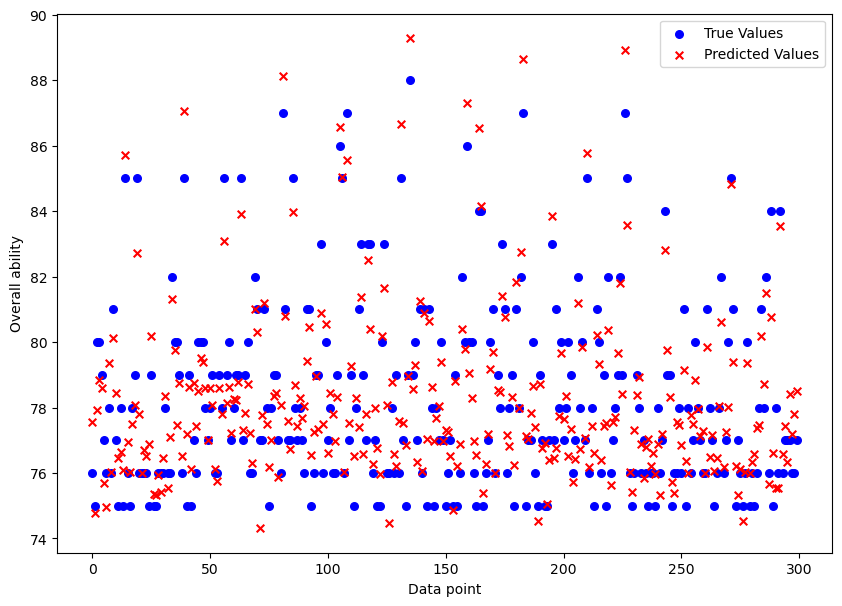

In [31]:
# Creating a scatter plot comparing trye values (y_test) and predicted values (y_predictions)
indices = np.arange(len(y_test))

plt.figure(figsize=(10, 7))
plt.scatter(indices, y_test, label="True Values", marker='o', color='blue', s=30)
plt.scatter(indices, y_predictions, label="Predicted Values", marker='x', color='red', s=30)

plt.xlabel("Data point")
plt.ylabel("Overall ability")
plt.legend()
plt.show()

In [32]:
correlations_matrix = df_concat.corr()
correlations_matrix = pd.DataFrame(correlations_matrix["ova"])
correlations_matrix["ova"] = np.absolute(correlations_matrix["ova"])
correlations_matrix = correlations_matrix.sort_values(by = ["ova"], ascending=False)
correlations_matrix

,ova
ova,1.000000
reactions,0.873617
base_stats,0.836175
composure,0.703798
pas,0.701653
...,...
height,0.026082
d/w_Low,0.021264
contract_Loan,0.017127
a/w_Low,0.006336


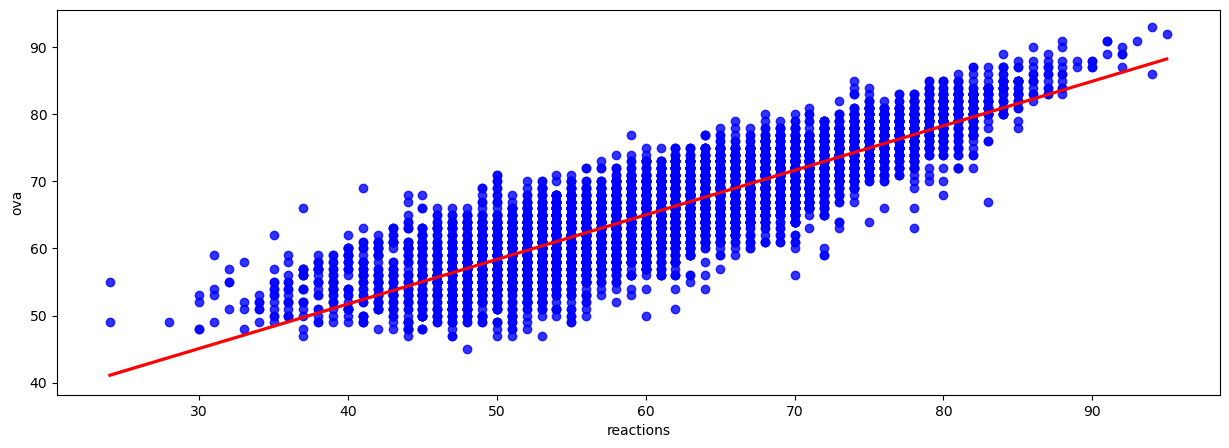

In [33]:
# Example of high correlation with ova (reactions)
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.regplot(y=df_concat['ova'],x=df_concat['reactions'] ,data=df_concat, color='red', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

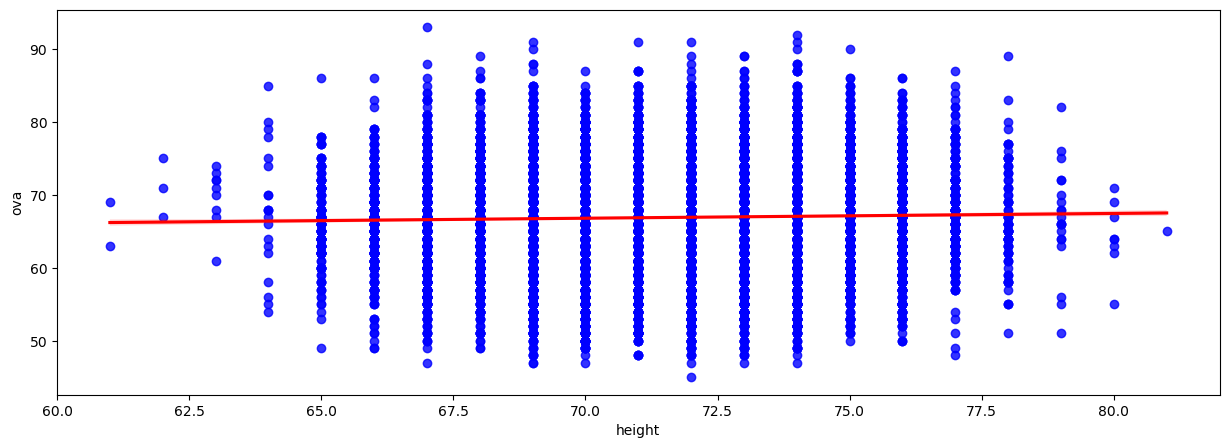

In [34]:
# Example of low correlation with ova (height)
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.regplot(y=df_concat['ova'],x=df_concat['height'] ,data=df_concat, color='red', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In [35]:
# Second approach: Automation

# Selecting the best players
df_concat = df_concat.sort_values(by = ["ova"], ascending=False)
df_concat = df_concat.iloc[0:1500,:]
df_concat = df_concat.reset_index(drop = True)
df_concat

# X-y split
X = df_concat.drop(["ova"], axis = 1)
y = df_concat["ova"]


# Trying different X shapes and iterating multiple models in order to find the best one
X1 = pd.DataFrame()
X2 = X
mse_min = 9998
mse_check = 9999


while mse_check > mse_min:
    mse_check = mse_min

    column_max = -1
    while column_max != 9999:
        column_max = 9999
        count = 0
        for _ in range(0,len(X2.columns)):
            XX = pd.concat([X1, X2.iloc[:, count]], axis = 1, ignore_index=False)
            X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 0)
            lm = linear_model.LinearRegression()
            model = lm.fit(X_train, y_train)
            y_predictions = lm.predict(X_test)
            mse = mean_squared_error(y_test, y_predictions)
            if mse < mse_min:
                mse_min = mse
                column_max = count  
            count += 1

        if column_max != 9999:
            X1 = pd.concat([X1, X2.iloc[:, column_max]], axis = 1, ignore_index=False)
            X2 = X2.drop(X2.columns[column_max], axis = 1)


    column_max = -1
    while column_max != 9999:
        column_max = 9999
        count = 0
        for _ in range(0,len(X1.columns)):
            XX = X1.drop(X1.columns[count], axis = 1)
            X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 0)
            lm = linear_model.LinearRegression()
            model = lm.fit(X_train, y_train)
            y_predictions = lm.predict(X_test)
            mse = mean_squared_error(y_test, y_predictions)
            if mse < mse_min:
                mse_min = mse
                column_max = count  
            count += 1

        if column_max != 9999:        
            X2 = pd.concat([X2, X1.iloc[:, column_max]], axis = 1, ignore_index=False) 
            X1 = X1.drop(X1.columns[column_max], axis = 1)

# Creating the model with the best solution found             
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# Printing R2 and errors 
mse = mean_squared_error(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)
rmse = np.sqrt(mse_min)
print("R2 values is =", r2_score(y_test, y_predictions))
print("The mean squared error of the model is =", mse)
print("The root mean squared error of the model is =", np.sqrt(mse))
print("The mean absolute error of the model is =",mae)

# This are the columns used for the model
X1

R2 values is = 0.8855570467703666
The mean squared error of the model is = 1.2792929231472407
The root mean squared error of the model is = 1.131058319958454
The mean absolute error of the model is = 0.8625497471266825


,value,reactions,ir,gk_diving,lwb,base_stats,heading_accuracy,total_stats,skill,short_passing,...,gk_positioning,power,gk_handling,volleys,penalties,weight,sm,wage,standing_tackle,a/w_Medium
0,67500000,94,5,6,69,466,70,2231,470,91,...,14,389,11,88.0,75,159,4,560000,35,1
1,46000000,95,5,7,68,464,90,2221,414,82,...,14,444,11,86.0,84,183,5,220000,32,0
2,90000000,91,5,9,70,451,62,2175,448,87,...,15,357,9,87.0,92,150,5,270000,30,0
3,80000000,93,4,15,67,457,85,2195,407,84,...,8,420,6,89.0,88,176,4,240000,42,0
4,87000000,91,4,15,82,485,55,2304,441,94,...,10,408,13,82.0,84,154,4,370000,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10000000,69,1,7,76,447,69,2145,388,75,...,14,379,15,59.0,69,154,4,15000,76,0
1496,6000000,70,2,12,62,399,52,1909,398,78,...,6,335,7,62.0,58,150,4,14000,23,1
1497,8000000,78,1,8,68,417,69,1978,347,74,...,8,362,7,72.0,71,154,3,42000,58,0
1498,8000000,72,1,12,66,344,73,1530,226,69,...,8,305,8,36.0,36,190,2,33000,79,1


In [36]:
# This are the columns not used for the model
X2

,age,height,release_clause,attacking,crossing,finishing,curve,fk_accuracy,ball_control,movement,...,lb,cb,rcb,rb,gk,contract_Free,contract_Permanent,d/w_High,d/w_Medium,a/w_High
0,33,67,138400000,429,85,95,93.0,94,96,451,...,65,55,55,65,22,0,1,0,0,0
1,35,74,75900000,437,84,95,81.0,76,92,431,...,64,57,57,64,23,0,1,0,0,1
2,28,69,166500000,408,85,87,88.0,89,95,453,...,65,52,52,65,23,0,1,0,1,1
3,31,72,132000000,423,71,94,79.0,85,88,407,...,64,63,63,64,22,0,1,0,1,1
4,29,71,161000000,407,94,82,85.0,83,92,398,...,78,72,72,78,24,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,23,68,17000000,341,69,69,83.0,75,80,405,...,76,72,72,76,21,0,1,0,1,1
1496,31,70,7500000,345,84,69,81.0,82,78,357,...,57,52,52,57,17,0,1,0,1,0
1497,26,70,15800000,363,70,78,68.0,62,77,369,...,66,63,63,66,18,0,1,0,1,1
1498,22,75,16800000,223,25,20,28.0,27,63,254,...,68,77,77,68,18,0,1,0,1,0


In [37]:
df_concat_test

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,...,gk,contract_Free,contract_Loan,contract_Permanent,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,19,76,198,15,325000,600,707000,247,26,61,...,18,0,0,1,0,0,1,0,1,0
1,21,72,159,12,975000,5000,1900000,274,50,58,...,19,0,0,1,0,0,1,0,0,1
2,21,71,159,8,400000,1000,920000,246,60,32,...,16,0,0,1,0,0,1,0,0,1
3,29,75,194,0,0,0,0,214,34,25,...,15,1,0,0,0,0,1,0,0,1
4,30,72,157,0,6000000,17000,8400000,313,62,61,...,22,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,27,67,150,0,925000,500,2000000,236,66,31,...,20,0,0,1,0,0,1,0,0,1
3421,26,67,157,2,1100000,6000,2000000,266,65,41,...,17,0,0,1,0,0,1,0,0,1
3422,21,72,179,11,1300000,6000,2500000,269,38,69,...,17,0,0,1,0,0,1,0,0,1
3423,26,70,161,3,3400000,13000,5000000,255,72,33,...,17,0,0,1,0,0,1,0,0,1


In [38]:
# Making sure that Test data has the same shape as X data so we can apply the model
df_concat_auxiliar2 = pd.concat([X1, df_concat_test], axis=0, join='inner', ignore_index=True)
df_test2 = df_concat_auxiliar2.iloc[len(X1):,:]
df_test2 = df_test2.reset_index(drop = True)
df_test2 = pd.concat([df_test_names, df_test2], axis = 1)
df_test2 = df_test2.dropna()
df_test2 = df_test2.reset_index(drop = True)

# Applying the model in Test data to predict "ova", and sorting them by that column
df_test_names2 = pd.DataFrame(df_test2["name"])
df_test2 = df_test2.drop(["name"], axis = 1)
ova_predictions = lm.predict(df_test2)
ova_predictions = pd.DataFrame({"ova":ova_predictions})
df_test2 = pd.concat([df_test2, ova_predictions], axis=1, ignore_index=False)
df_test2 = pd.concat([df_test_names2, df_test2], axis = 1)
df_test2 = df_test2.sort_values(by = ["ova"], ascending=False)
df_test2 = df_test2.reset_index(drop = True)
df_plot = df_test2
df_test2.iloc[0:20,:]

,name,value,reactions,ir,gk_diving,lwb,base_stats,heading_accuracy,total_stats,skill,...,power,gk_handling,volleys,penalties,weight,sm,wage,standing_tackle,a/w_Medium,ova
0,K. Mbappé,105500000,92,3,13,70,466,73,2147,394,...,404,5,83.0,70,161,5,160000,34,0,96.728495
1,S. Mané,78000000,93,3,10,72,469,84,2203,391,...,406,10,75.0,71,152,4,250000,42,0,93.266380
2,V. van Dijk,75500000,89,3,13,83,455,87,2112,363,...,402,10,45.0,62,203,2,210000,93,1,92.777715
3,P. Dybala,71000000,84,3,5,71,452,64,2154,436,...,382,4,88.0,86,165,4,190000,48,1,90.595793
4,F. de Jong,50500000,88,3,7,85,468,66,2185,409,...,369,13,69.0,45,163,4,190000,76,1,88.318397
5,N. Kanté,51000000,91,3,15,88,468,54,2169,336,...,381,12,56.0,54,154,2,190000,90,1,88.197326
6,A. Robertson,53000000,84,3,11,88,461,67,2127,358,...,365,8,32.0,55,141,3,155000,84,0,87.865933
7,M. Neuer,29000000,86,5,87,39,497,25,1515,160,...,284,87,11.0,47,203,1,125000,10,1,87.694217
8,S. Milinković-Savić,49000000,83,2,7,80,475,86,2225,412,...,421,10,74.0,56,168,4,94000,79,0,86.341903
9,R. Lukaku,45000000,86,3,8,63,437,85,2019,371,...,400,15,77.0,78,207,3,165000,41,1,86.247033


In [39]:
# Selecting players with "value" less than or equal to 100M
df_test2 = df_test2[df_test2["value"] <= 100000000]
df_test2 = df_test2.reset_index(drop = True)
df_test2.iloc[0:20,:]

,name,value,reactions,ir,gk_diving,lwb,base_stats,heading_accuracy,total_stats,skill,...,power,gk_handling,volleys,penalties,weight,sm,wage,standing_tackle,a/w_Medium,ova
0,S. Mané,78000000,93,3,10,72,469,84,2203,391,...,406,10,75.0,71,152,4,250000,42,0,93.266380
1,V. van Dijk,75500000,89,3,13,83,455,87,2112,363,...,402,10,45.0,62,203,2,210000,93,1,92.777715
2,P. Dybala,71000000,84,3,5,71,452,64,2154,436,...,382,4,88.0,86,165,4,190000,48,1,90.595793
3,F. de Jong,50500000,88,3,7,85,468,66,2185,409,...,369,13,69.0,45,163,4,190000,76,1,88.318397
4,N. Kanté,51000000,91,3,15,88,468,54,2169,336,...,381,12,56.0,54,154,2,190000,90,1,88.197326
5,A. Robertson,53000000,84,3,11,88,461,67,2127,358,...,365,8,32.0,55,141,3,155000,84,0,87.865933
6,M. Neuer,29000000,86,5,87,39,497,25,1515,160,...,284,87,11.0,47,203,1,125000,10,1,87.694217
7,S. Milinković-Savić,49000000,83,2,7,80,475,86,2225,412,...,421,10,74.0,56,168,4,94000,79,0,86.341903
8,R. Lukaku,45000000,86,3,8,63,437,85,2019,371,...,400,15,77.0,78,207,3,165000,41,1,86.247033
9,G. Wijnaldum,37000000,86,3,16,84,475,78,2267,405,...,399,6,73.0,74,152,4,150000,79,0,86.209497


In [40]:
# Iterating players and selecting the most 3 valuable players with a joint total value less than or equal to 100M
sample_size = 3
while sample_size <= len(df_test2):
    player1 = 0
    while player1 < sample_size - 2:
        player2 = player1 + 1
        while player2 < sample_size - 1:
            player3 = player2 + 1
            while player3 < sample_size :
                
                if df_test2.loc[player1,"value"] + df_test2.loc[player2,"value"] + df_test2.loc[player3,"value"] <= 100000000:
                    player1_stats = np.transpose(pd.DataFrame(df_test2.loc[player1,["name","value","ova"]]))
                    player2_stats = np.transpose(pd.DataFrame(df_test2.loc[player2,["name","value","ova"]]))
                    player3_stats = np.transpose(pd.DataFrame(df_test2.loc[player3,["name","value","ova"]]))
                    sample_size = 9999
                    player1 = 9999
                    player2 = 9999
                    player3 = 9999
                    
                player3 += 1
            player2 += 1
        player1 += 1
    sample_size += 1

# Creating a dataframe with the selected players
df_players = pd.concat([player1_stats, player2_stats, player3_stats], axis = 0)
df_players

,name,value,ova
6,M. Neuer,29000000,87.694217
9,G. Wijnaldum,37000000,86.209497
10,P. Lahm,29500000,86.127674
